<a href="https://colab.research.google.com/github/svanalex/HaikusFromPaintings/blob/main/ImageAnalysisModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##YOLO

In [ ]:
#This is a test setup to get YOLO working and spitting out the objects that it is detecting

#Note, it might be useful if it can also dictate the size of the bounding box associated with the object to give some context/weight to the first LLM

In [ ]:
%pip install ultralytics
import ultralytics
from ultralytics import YOLO
import cv2
import pandas as pd
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.4/107.7 GB disk)


In [ ]:
def load_image(image_path):
    image = cv2.imread(image_path)
    return image

In [ ]:
def predict_image(model, image):
    results = model.predict(image)
    return results

In [ ]:
def draw_bounding_boxes(image, results):
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            # Add class name and confidence
            label = f"{result.names[int(box.cls[0])]}: {box.conf[0]:.2f}"
            cv2.putText(image, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

In [ ]:
def display_image(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Optionally turn off axis
    plt.show()

In [ ]:
def main():
    model = YOLO('yolov8n.pt')
    image_path = '/content/monet.jpg'
    image = load_image(image_path)
    results = predict_image(model, image)
    draw_bounding_boxes(image, results)
    display_image(image)


0: 512x640 1 person, 1 boat, 321.4ms
Speed: 5.7ms preprocess, 321.4ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 640)


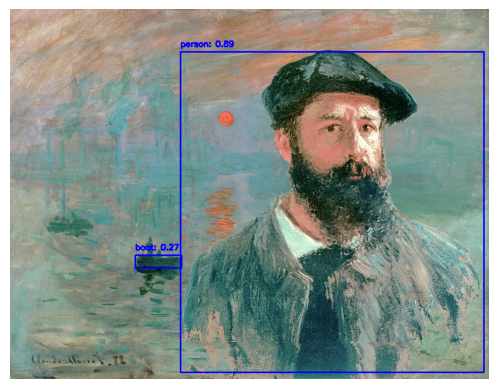

In [ ]:
if __name__ == "__main__":
    main()

##YOLO with LVIS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://storage.googleapis.com/lvis-dataset/lvis_v1_train.json -P /content/
!wget https://storage.googleapis.com/lvis-dataset/lvis_v1_val.json -P /content/
!wget https://storage.googleapis.com/lvis-dataset/lvis_v1_test.json -P /content/
!wget https://storage.googleapis.com/lvis-dataset/lvis_v1_train_images.zip -P /content/


--2025-03-03 18:32:47--  https://storage.googleapis.com/lvis-dataset/lvis_v1_train.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.184.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.184.207|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-03-03 18:32:47 ERROR 403: Forbidden.

--2025-03-03 18:32:47--  https://storage.googleapis.com/lvis-dataset/lvis_v1_val.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.184.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.184.207|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-03-03 18:32:48 ERROR 403: Forbidden.

--2025-03-03 18:32:48--  https://storage.googleapis.com/lvis-dataset/lvis_v1_test.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.184.207, 74.125.201.207, 74.125.202.207, ...
Connectin

In [ ]:
!pip install ultralytics
!pip install torch torchvision
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# LVIS dataset http://www.lvisdataset.org by Facebook AI Research.
# Documentation: https://docs.ultralytics.com/datasets/detect/lvis/
# Example usage: yolo train data=lvis.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── lvis  ← downloads here (20.1 GB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/lvis # dataset root dir
train: train.txt # train images (relative to 'path') 100170 images
val: val.txt # val images (relative to 'path') 19809 images
minival: minival.txt # minival images (relative to 'path') 5000 images

names:
  0: aerosol can/spray can
  1: air conditioner
  2: airplane/aeroplane
  3: alarm clock
  4: alcohol/alcoholic beverage
  5: alligator/gator
  6: almond
  7: ambulance
  8: amplifier
  9: anklet/ankle bracelet
  10: antenna/aerial/transmitting aerial
  11: apple
  12: applesauce
  13: apricot
  14: apron
  15: aquarium/fish tank
  16: arctic/arctic type of shoe/galosh/golosh/rubber/rubber type of shoe/gumshoe
  17: armband
  18: armchair
  19: armoire
  20: armor/armour
  21: artichoke
  22: trash can/garbage can/wastebin/dustbin/trash barrel/trash bin
  23: ashtray
  24: asparagus
  25: atomizer/atomiser/spray/sprayer/nebulizer/nebuliser
  26: avocado
  27: award/accolade
  28: awning
  29: ax/axe
  30: baboon
  31: baby buggy/baby carriage/perambulator/pram/stroller
  32: basketball backboard
  33: backpack/knapsack/packsack/rucksack/haversack
  34: handbag/purse/pocketbook
  35: suitcase/baggage/luggage
  36: bagel/beigel
  37: bagpipe
  38: baguet/baguette
  39: bait/lure
  40: ball
  41: ballet skirt/tutu
  42: balloon
  43: bamboo
  44: banana
  45: Band Aid
  46: bandage
  47: bandanna/bandana
  48: banjo
  49: banner/streamer
  50: barbell
  51: barge
  52: barrel/cask
  53: barrette
  54: barrow/garden cart/lawn cart/wheelbarrow
  55: baseball base
  56: baseball
  57: baseball bat
  58: baseball cap/jockey cap/golf cap
  59: baseball glove/baseball mitt
  60: basket/handbasket
  61: basketball
  62: bass horn/sousaphone/tuba
  63: bat/bat animal
  64: bath mat
  65: bath towel
  66: bathrobe
  67: bathtub/bathing tub
  68: batter/batter food
  69: battery
  70: beachball
  71: bead
  72: bean curd/tofu
  73: beanbag
  74: beanie/beany
  75: bear
  76: bed
  77: bedpan
  78: bedspread/bedcover/bed covering/counterpane/spread
  79: cow
  80: beef/beef food/boeuf/boeuf food
  81: beeper/pager
  82: beer bottle
  83: beer can
  84: beetle
  85: bell
  86: bell pepper/capsicum
  87: belt
  88: belt buckle
  89: bench
  90: beret
  91: bib
  92: Bible
  93: bicycle/bike/bike bicycle
  94: visor/vizor
  95: billboard
  96: binder/ring-binder
  97: binoculars/field glasses/opera glasses
  98: bird
  99: birdfeeder
  100: birdbath
  101: birdcage
  102: birdhouse
  103: birthday cake
  104: birthday card
  105: pirate flag
  106: black sheep
  107: blackberry
  108: blackboard/chalkboard
  109: blanket
  110: blazer/sport jacket/sport coat/sports jacket/sports coat
  111: blender/liquidizer/liquidiser
  112: blimp
  113: blinker/flasher
  114: blouse
  115: blueberry
  116: gameboard
  117: boat/ship/ship boat
  118: bob/bobber/bobfloat
  119: bobbin/spool/reel
  120: bobby pin/hairgrip
  121: boiled egg/coddled egg
  122: bolo tie/bolo/bola tie/bola
  123: deadbolt
  124: bolt
  125: bonnet
  126: book
  127: bookcase
  128: booklet/brochure/leaflet/pamphlet
  129: bookmark/bookmarker
  130: boom microphone/microphone boom
  131: boot
  132: bottle
  133: bottle opener
  134: bouquet
  135: bow/bow weapon
  136: bow/bow decorative ribbons
  137: bow-tie/bowtie
  138: bowl
  139: pipe bowl
  140: bowler hat/bowler/derby hat/derby/plug hat
  141: bowling ball
  142: box
  143: boxing glove
  144: suspenders
  145: bracelet/bangle
  146: brass plaque
  147: brassiere/bra/bandeau
  148: bread-bin/breadbox
  149: bread
  150: breechcloth/breechclout/loincloth
  151: bridal gown/wedding gown/wedding dress
  152: briefcase
  153: broccoli
  154: broach
  155: broom
  156: brownie
  157: brussels sprouts
  158: bubble gum
  159: bucket/pail
  160: horse buggy
  161: horned cow
  162: bulldog
  163: bulldozer/dozer
  164: bullet train
  165: bulletin board/notice board
  166: bulletproof vest
  167: bullhorn/megaphone
  168: bun/roll
  169: bunk bed
  170: buoy
  171: burrito
  172: bus/bus vehicle/autobus/charabanc/double-decker/motorbus/motorcoach
  173: business card
  174: butter
  175: butterfly
  176: button
  177: cab/cab taxi/taxi/taxicab
  178: cabana
  179: cabin car/caboose
  180: cabinet
  181: locker/storage locker
  182: cake
  183: calculator
  184: calendar
  185: calf
  186: camcorder
  187: camel
  188: camera
  189: camera lens
  190: camper/camper vehicle/camping bus/motor home
  191: can/tin can
  192: can opener/tin opener
  193: candle/candlestick
  194: candle holder
  195: candy bar
  196: candy cane
  197: walking cane
  198: canister/canister
  199: canoe
  200: cantaloup/cantaloupe
  201: canteen
  202: cap/cap headwear
  203: bottle cap/cap/cap container lid
  204: cape
  205: cappuccino/coffee cappuccino
  206: car/car automobile/auto/auto automobile/automobile
  207: railcar/railcar part of a train/railway car/railway car part of a train/railroad car/railroad car part of a train
  208: elevator car
  209: car battery/automobile battery
  210: identity card
  211: card
  212: cardigan
  213: cargo ship/cargo vessel
  214: carnation
  215: horse carriage
  216: carrot
  217: tote bag
  218: cart
  219: carton
  220: cash register/register/register for cash transactions
  221: casserole
  222: cassette
  223: cast/plaster cast/plaster bandage
  224: cat
  225: cauliflower
  226: cayenne/cayenne spice/cayenne pepper/cayenne pepper spice/red pepper/red pepper spice
  227: CD player
  228: celery
  229: cellular telephone/cellular phone/cellphone/mobile phone/smart phone
  230: chain mail/ring mail/chain armor/chain armour/ring armor/ring armour
  231: chair
  232: chaise longue/chaise/daybed
  233: chalice
  234: chandelier
  235: chap
  236: checkbook/chequebook
  237: checkerboard
  238: cherry
  239: chessboard
  240: chicken/chicken animal
  241: chickpea/garbanzo
  242: chili/chili vegetable/chili pepper/chili pepper vegetable/chilli/chilli vegetable/chilly/chilly vegetable/chile/chile vegetable
  243: chime/gong
  244: chinaware
  245: crisp/crisp potato chip/potato chip
  246: poker chip
  247: chocolate bar
  248: chocolate cake
  249: chocolate milk
  250: chocolate mousse
  251: choker/collar/neckband
  252: chopping board/cutting board/chopping block
  253: chopstick
  254: Christmas tree
  255: slide
  256: cider/cyder
  257: cigar box
  258: cigarette
  259: cigarette case/cigarette pack
  260: cistern/water tank
  261: clarinet
  262: clasp
  263: cleansing agent/cleanser/cleaner
  264: cleat/cleat for securing rope
  265: clementine
  266: clip
  267: clipboard
  268: clippers/clippers for plants
  269: cloak
  270: clock/timepiece/timekeeper
  271: clock tower
  272: clothes hamper/laundry basket/clothes basket
  273: clothespin/clothes peg
  274: clutch bag
  275: coaster
  276: coat
  277: coat hanger/clothes hanger/dress hanger
  278: coatrack/hatrack
  279: cock/rooster
  280: cockroach
  281: cocoa/cocoa beverage/hot chocolate/hot chocolate beverage/drinking chocolate
  282: coconut/cocoanut
  283: coffee maker/coffee machine
  284: coffee table/cocktail table
  285: coffeepot
  286: coil
  287: coin
  288: colander/cullender
  289: coleslaw/slaw
  290: coloring material/colouring material
  291: combination lock
  292: pacifier/teething ring
  293: comic book
  294: compass
  295: computer keyboard/keyboard/keyboard computer
  296: condiment
  297: cone/traffic cone
  298: control/controller
  299: convertible/convertible automobile
  300: sofa bed
  301: cooker
  302: cookie/cooky/biscuit/biscuit cookie
  303: cooking utensil
  304: cooler/cooler for food/ice chest
  305: cork/cork bottle plug/bottle cork
  306: corkboard
  307: corkscrew/bottle screw
  308: edible corn/corn/maize
  309: cornbread
  310: cornet/horn/trumpet
  311: cornice/valance/valance board/pelmet
  312: cornmeal
  313: corset/girdle
  314: costume
  315: cougar/puma/catamount/mountain lion/panther
  316: coverall
  317: cowbell
  318: cowboy hat/ten-gallon hat
  319: crab/crab animal
  320: crabmeat
  321: cracker
  322: crape/crepe/French pancake
  323: crate
  324: crayon/wax crayon
  325: cream pitcher
  326: crescent roll/croissant
  327: crib/cot
  328: crock pot/earthenware jar
  329: crossbar
  330: crouton
  331: crow
  332: crowbar/wrecking bar/pry bar
  333: crown
  334: crucifix
  335: cruise ship/cruise liner
  336: police cruiser/patrol car/police car/squad car
  337: crumb
  338: crutch
  339: cub/cub animal
  340: cube/square block
  341: cucumber/cuke
  342: cufflink
  343: cup
  344: trophy cup
  345: cupboard/closet
  346: cupcake
  347: hair curler/hair roller/hair crimper
  348: curling iron
  349: curtain/drapery
  350: cushion
  351: cylinder
  352: cymbal
  353: dagger
  354: dalmatian
  355: dartboard
  356: date/date fruit
  357: deck chair/beach chair
  358: deer/cervid
  359: dental floss/floss
  360: desk
  361: detergent
  362: diaper
  363: diary/journal
  364: die/dice
  365: dinghy/dory/rowboat
  366: dining table
  367: tux/tuxedo
  368: dish
  369: dish antenna
  370: dishrag/dishcloth
  371: dishtowel/tea towel
  372: dishwasher/dishwashing machine
  373: dishwasher detergent/dishwashing detergent/dishwashing liquid/dishsoap
  374: dispenser
  375: diving board
  376: Dixie cup/paper cup
  377: dog
  378: dog collar
  379: doll
  380: dollar/dollar bill/one dollar bill
  381: dollhouse/dolls house
  382: dolphin
  383: domestic ass/donkey
  384: doorknob/doorhandle
  385: doormat/welcome mat
  386: doughnut/donut
  387: dove
  388: dragonfly
  389: drawer
  390: underdrawers/boxers/boxershorts
  391: dress/frock
  392: dress hat/high hat/opera hat/silk hat/top hat
  393: dress suit
  394: dresser
  395: drill
  396: drone
  397: dropper/eye dropper
  398: drum/drum musical instrument
  399: drumstick
  400: duck
  401: duckling
  402: duct tape
  403: duffel bag/duffle bag/duffel/duffle
  404: dumbbell
  405: dumpster
  406: dustpan
  407: eagle
  408: earphone/earpiece/headphone
  409: earplug
  410: earring
  411: easel
  412: eclair
  413: eel
  414: egg/eggs
  415: egg roll/spring roll
  416: egg yolk/yolk/yolk egg
  417: eggbeater/eggwhisk
  418: eggplant/aubergine
  419: electric chair
  420: refrigerator
  421: elephant
  422: elk/moose
  423: envelope
  424: eraser
  425: escargot
  426: eyepatch
  427: falcon
  428: fan
  429: faucet/spigot/tap
  430: fedora
  431: ferret
  432: Ferris wheel
  433: ferry/ferryboat
  434: fig/fig fruit
  435: fighter jet/fighter aircraft/attack aircraft
  436: figurine
  437: file cabinet/filing cabinet
  438: file/file tool
  439: fire alarm/smoke alarm
  440: fire engine/fire truck
  441: fire extinguisher/extinguisher
  442: fire hose
  443: fireplace
  444: fireplug/fire hydrant/hydrant
  445: first-aid kit
  446: fish
  447: fish/fish food
  448: fishbowl/goldfish bowl
  449: fishing rod/fishing pole
  450: flag
  451: flagpole/flagstaff
  452: flamingo
  453: flannel
  454: flap
  455: flash/flashbulb
  456: flashlight/torch
  457: fleece
  458: flip-flop/flip-flop sandal
  459: flipper/flipper footwear/fin/fin footwear
  460: flower arrangement/floral arrangement
  461: flute glass/champagne flute
  462: foal
  463: folding chair
  464: food processor
  465: football/football American
  466: football helmet
  467: footstool/footrest
  468: fork
  469: forklift
  470: freight car
  471: French toast
  472: freshener/air freshener
  473: frisbee
  474: frog/toad/toad frog
  475: fruit juice
  476: frying pan/frypan/skillet
  477: fudge
  478: funnel
  479: futon
  480: gag/muzzle
  481: garbage
  482: garbage truck
  483: garden hose
  484: gargle/mouthwash
  485: gargoyle
  486: garlic/ail
  487: gasmask/respirator/gas helmet
  488: gazelle
  489: gelatin/jelly
  490: gemstone
  491: generator
  492: giant panda/panda/panda bear
  493: gift wrap
  494: ginger/gingerroot
  495: giraffe
  496: cincture/sash/waistband/waistcloth
  497: glass/glass drink container/drinking glass
  498: globe
  499: glove
  500: goat
  501: goggles
  502: goldfish
  503: golf club/golf-club
  504: golfcart
  505: gondola/gondola boat
  506: goose
  507: gorilla
  508: gourd
  509: grape
  510: grater
  511: gravestone/headstone/tombstone
  512: gravy boat/gravy holder
  513: green bean
  514: green onion/spring onion/scallion
  515: griddle
  516: grill/grille/grillwork/radiator grille
  517: grits/hominy grits
  518: grizzly/grizzly bear
  519: grocery bag
  520: guitar
  521: gull/seagull
  522: gun
  523: hairbrush
  524: hairnet
  525: hairpin
  526: halter top
  527: ham/jambon/gammon
  528: hamburger/beefburger/burger
  529: hammer
  530: hammock
  531: hamper
  532: hamster
  533: hair dryer
  534: hand glass/hand mirror
  535: hand towel/face towel
  536: handcart/pushcart/hand truck
  537: handcuff
  538: handkerchief
  539: handle/grip/handgrip
  540: handsaw/carpenters saw
  541: hardback book/hardcover book
  542: harmonium/organ/organ musical instrument/reed organ/reed organ musical instrument
  543: hat
  544: hatbox
  545: veil
  546: headband
  547: headboard
  548: headlight/headlamp
  549: headscarf
  550: headset
  551: headstall/headstall for horses/headpiece/headpiece for horses
  552: heart
  553: heater/warmer
  554: helicopter
  555: helmet
  556: heron
  557: highchair/feeding chair
  558: hinge
  559: hippopotamus
  560: hockey stick
  561: hog/pig
  562: home plate/home plate baseball/home base/home base baseball
  563: honey
  564: fume hood/exhaust hood
  565: hook
  566: hookah/narghile/nargileh/sheesha/shisha/water pipe
  567: hornet
  568: horse
  569: hose/hosepipe
  570: hot-air balloon
  571: hotplate
  572: hot sauce
  573: hourglass
  574: houseboat
  575: hummingbird
  576: hummus/humus/hommos/hoummos/humous
  577: polar bear
  578: icecream
  579: popsicle
  580: ice maker
  581: ice pack/ice bag
  582: ice skate
  583: igniter/ignitor/lighter
  584: inhaler/inhalator
  585: iPod
  586: iron/iron for clothing/smoothing iron/smoothing iron for clothing
  587: ironing board
  588: jacket
  589: jam
  590: jar
  591: jean/blue jean/denim
  592: jeep/landrover
  593: jelly bean/jelly egg
  594: jersey/T-shirt/tee shirt
  595: jet plane/jet-propelled plane
  596: jewel/gem/precious stone
  597: jewelry/jewellery
  598: joystick
  599: jumpsuit
  600: kayak
  601: keg
  602: kennel/doghouse
  603: kettle/boiler
  604: key
  605: keycard
  606: kilt
  607: kimono
  608: kitchen sink
  609: kitchen table
  610: kite
  611: kitten/kitty
  612: kiwi fruit
  613: knee pad
  614: knife
  615: knitting needle
  616: knob
  617: knocker/knocker on a door/doorknocker
  618: koala/koala bear
  619: lab coat/laboratory coat
  620: ladder
  621: ladle
  622: ladybug/ladybeetle/ladybird beetle
  623: lamb/lamb animal
  624: lamb-chop/lambchop
  625: lamp
  626: lamppost
  627: lampshade
  628: lantern
  629: lanyard/laniard
  630: laptop computer/notebook computer
  631: lasagna/lasagne
  632: latch
  633: lawn mower
  634: leather
  635: legging/legging clothing/leging/leging clothing/leg covering
  636: Lego/Lego set
  637: legume
  638: lemon
  639: lemonade
  640: lettuce
  641: license plate/numberplate
  642: life buoy/lifesaver/life belt/life ring
  643: life jacket/life vest
  644: lightbulb
  645: lightning rod/lightning conductor
  646: lime
  647: limousine
  648: lion
  649: lip balm
  650: liquor/spirits/hard liquor/liqueur/cordial
  651: lizard
  652: log
  653: lollipop
  654: speaker/speaker stereo equipment
  655: loveseat
  656: machine gun
  657: magazine
  658: magnet
  659: mail slot
  660: mailbox/mailbox at home/letter box/letter box at home
  661: mallard
  662: mallet
  663: mammoth
  664: manatee
  665: mandarin orange
  666: manager/through
  667: manhole
  668: map
  669: marker
  670: martini
  671: mascot
  672: mashed potato
  673: masher
  674: mask/facemask
  675: mast
  676: mat/mat gym equipment/gym mat
  677: matchbox
  678: mattress
  679: measuring cup
  680: measuring stick/ruler/ruler measuring stick/measuring rod
  681: meatball
  682: medicine
  683: melon
  684: microphone
  685: microscope
  686: microwave oven
  687: milestone/milepost
  688: milk
  689: milk can
  690: milkshake
  691: minivan
  692: mint candy
  693: mirror
  694: mitten
  695: mixer/mixer kitchen tool/stand mixer
  696: money
  697: monitor/monitor computer equipment
  698: monkey
  699: motor
  700: motor scooter/scooter
  701: motor vehicle/automotive vehicle
  702: motorcycle
  703: mound/mound baseball/pitcher's mound
  704: mouse/mouse computer equipment/computer mouse
  705: mousepad
  706: muffin
  707: mug
  708: mushroom
  709: music stool/piano stool
  710: musical instrument/instrument/instrument musical
  711: nailfile
  712: napkin/table napkin/serviette
  713: neckerchief
  714: necklace
  715: necktie/tie/tie necktie
  716: needle
  717: nest
  718: newspaper/paper/paper newspaper
  719: newsstand
  720: nightshirt/nightwear/sleepwear/nightclothes
  721: nosebag/nosebag for animals/feedbag
  722: noseband/noseband for animals/nosepiece/nosepiece for animals
  723: notebook
  724: notepad
  725: nut
  726: nutcracker
  727: oar
  728: octopus/octopus food
  729: octopus/octopus animal
  730: oil lamp/kerosene lamp/kerosine lamp
  731: olive oil
  732: omelet/omelette
  733: onion
  734: orange/orange fruit
  735: orange juice
  736: ostrich
  737: ottoman/pouf/pouffe/hassock
  738: oven
  739: overalls/overalls clothing
  740: owl
  741: packet
  742: inkpad/inking pad/stamp pad
  743: pad
  744: paddle/boat paddle
  745: padlock
  746: paintbrush
  747: painting
  748: pajamas/pyjamas
  749: palette/pallet
  750: pan/pan for cooking/cooking pan
  751: pan/pan metal container
  752: pancake
  753: pantyhose
  754: papaya
  755: paper plate
  756: paper towel
  757: paperback book/paper-back book/softback book/soft-cover book
  758: paperweight
  759: parachute
  760: parakeet/parrakeet/parroket/paraquet/paroquet/parroquet
  761: parasail/parasail sports
  762: parasol/sunshade
  763: parchment
  764: parka/anorak
  765: parking meter
  766: parrot
  767: passenger car/passenger car part of a train/coach/coach part of a train
  768: passenger ship
  769: passport
  770: pastry
  771: patty/patty food
  772: pea/pea food
  773: peach
  774: peanut butter
  775: pear
  776: peeler/peeler tool for fruit and vegetables
  777: wooden leg/pegleg
  778: pegboard
  779: pelican
  780: pen
  781: pencil
  782: pencil box/pencil case
  783: pencil sharpener
  784: pendulum
  785: penguin
  786: pennant
  787: penny/penny coin
  788: pepper/peppercorn
  789: pepper mill/pepper grinder
  790: perfume
  791: persimmon
  792: person/baby/child/boy/girl/man/woman/human
  793: pet
  794: pew/pew church bench/church bench
  795: phonebook/telephone book/telephone directory
  796: phonograph record/phonograph recording/record/record phonograph recording
  797: piano
  798: pickle
  799: pickup truck
  800: pie
  801: pigeon
  802: piggy bank/penny bank
  803: pillow
  804: pin/pin non jewelry
  805: pineapple
  806: pinecone
  807: ping-pong ball
  808: pinwheel
  809: tobacco pipe
  810: pipe/piping
  811: pistol/handgun
  812: pita/pita bread/pocket bread
  813: pitcher/pitcher vessel for liquid/ewer
  814: pitchfork
  815: pizza
  816: place mat
  817: plate
  818: platter
  819: playpen
  820: pliers/plyers
  821: plow/plow farm equipment/plough/plough farm equipment
  822: plume
  823: pocket watch
  824: pocketknife
  825: poker/poker fire stirring tool/stove poker/fire hook
  826: pole/post
  827: polo shirt/sport shirt
  828: poncho
  829: pony
  830: pool table/billiard table/snooker table
  831: pop/pop soda/soda/soda pop/tonic/soft drink
  832: postbox/postbox public/mailbox/mailbox public
  833: postcard/postal card/mailing-card
  834: poster/placard
  835: pot
  836: flowerpot
  837: potato
  838: potholder
  839: pottery/clayware
  840: pouch
  841: power shovel/excavator/digger
  842: prawn/shrimp
  843: pretzel
  844: printer/printing machine
  845: projectile/projectile weapon/missile
  846: projector
  847: propeller/propellor
  848: prune
  849: pudding
  850: puffer/puffer fish/pufferfish/blowfish/globefish
  851: puffin
  852: pug-dog
  853: pumpkin
  854: puncher
  855: puppet/marionette
  856: puppy
  857: quesadilla
  858: quiche
  859: quilt/comforter
  860: rabbit
  861: race car/racing car
  862: racket/racquet
  863: radar
  864: radiator
  865: radio receiver/radio set/radio/tuner/tuner radio
  866: radish/daikon
  867: raft
  868: rag doll
  869: raincoat/waterproof jacket
  870: ram/ram animal
  871: raspberry
  872: rat
  873: razorblade
  874: reamer/reamer juicer/juicer/juice reamer
  875: rearview mirror
  876: receipt
  877: recliner/reclining chair/lounger/lounger chair
  878: record player/phonograph/phonograph record player/turntable
  879: reflector
  880: remote control
  881: rhinoceros
  882: rib/rib food
  883: rifle
  884: ring
  885: river boat
  886: road map
  887: robe
  888: rocking chair
  889: rodent
  890: roller skate
  891: Rollerblade
  892: rolling pin
  893: root beer
  894: router/router computer equipment
  895: rubber band/elastic band
  896: runner/runner carpet
  897: plastic bag/paper bag
  898: saddle/saddle on an animal
  899: saddle blanket/saddlecloth/horse blanket
  900: saddlebag
  901: safety pin
  902: sail
  903: salad
  904: salad plate/salad bowl
  905: salami
  906: salmon/salmon fish
  907: salmon/salmon food
  908: salsa
  909: saltshaker
  910: sandal/sandal type of shoe
  911: sandwich
  912: satchel
  913: saucepan
  914: saucer
  915: sausage
  916: sawhorse/sawbuck
  917: saxophone
  918: scale/scale measuring instrument
  919: scarecrow/strawman
  920: scarf
  921: school bus
  922: scissors
  923: scoreboard
  924: scraper
  925: screwdriver
  926: scrubbing brush
  927: sculpture
  928: seabird/seafowl
  929: seahorse
  930: seaplane/hydroplane
  931: seashell
  932: sewing machine
  933: shaker
  934: shampoo
  935: shark
  936: sharpener
  937: Sharpie
  938: shaver/shaver electric/electric shaver/electric razor
  939: shaving cream/shaving soap
  940: shawl
  941: shears
  942: sheep
  943: shepherd dog/sheepdog
  944: sherbert/sherbet
  945: shield
  946: shirt
  947: shoe/sneaker/sneaker type of shoe/tennis shoe
  948: shopping bag
  949: shopping cart
  950: short pants/shorts/shorts clothing/trunks/trunks clothing
  951: shot glass
  952: shoulder bag
  953: shovel
  954: shower head
  955: shower cap
  956: shower curtain
  957: shredder/shredder for paper
  958: signboard
  959: silo
  960: sink
  961: skateboard
  962: skewer
  963: ski
  964: ski boot
  965: ski parka/ski jacket
  966: ski pole
  967: skirt
  968: skullcap
  969: sled/sledge/sleigh
  970: sleeping bag
  971: sling/sling bandage/triangular bandage
  972: slipper/slipper footwear/carpet slipper/carpet slipper footwear
  973: smoothie
  974: snake/serpent
  975: snowboard
  976: snowman
  977: snowmobile
  978: soap
  979: soccer ball
  980: sock
  981: sofa/couch/lounge
  982: softball
  983: solar array/solar battery/solar panel
  984: sombrero
  985: soup
  986: soup bowl
  987: soupspoon
  988: sour cream/soured cream
  989: soya milk/soybean milk/soymilk
  990: space shuttle
  991: sparkler/sparkler fireworks
  992: spatula
  993: spear/lance
  994: spectacles/specs/eyeglasses/glasses
  995: spice rack
  996: spider
  997: crawfish/crayfish
  998: sponge
  999: spoon
  1000: sportswear/athletic wear/activewear
  1001: spotlight
  1002: squid/squid food/calamari/calamary
  1003: squirrel
  1004: stagecoach
  1005: stapler/stapler stapling machine
  1006: starfish/sea star
  1007: statue/statue sculpture
  1008: steak/steak food
  1009: steak knife
  1010: steering wheel
  1011: stepladder
  1012: step stool
  1013: stereo/stereo sound system
  1014: stew
  1015: stirrer
  1016: stirrup
  1017: stool
  1018: stop sign
  1019: brake light
  1020: stove/kitchen stove/range/range kitchen appliance/kitchen range/cooking stove
  1021: strainer
  1022: strap
  1023: straw/straw for drinking/drinking straw
  1024: strawberry
  1025: street sign
  1026: streetlight/street lamp
  1027: string cheese
  1028: stylus
  1029: subwoofer
  1030: sugar bowl
  1031: sugarcane/sugarcane plant
  1032: suit/suit clothing
  1033: sunflower
  1034: sunglasses
  1035: sunhat
  1036: surfboard
  1037: sushi
  1038: mop
  1039: sweat pants
  1040: sweatband
  1041: sweater
  1042: sweatshirt
  1043: sweet potato
  1044: swimsuit/swimwear/bathing suit/swimming costume/bathing costume/swimming trunks/bathing trunks
  1045: sword
  1046: syringe
  1047: Tabasco sauce
  1048: table-tennis table/ping-pong table
  1049: table
  1050: table lamp
  1051: tablecloth
  1052: tachometer
  1053: taco
  1054: tag
  1055: taillight/rear light
  1056: tambourine
  1057: army tank/armored combat vehicle/armoured combat vehicle
  1058: tank/tank storage vessel/storage tank
  1059: tank top/tank top clothing
  1060: tape/tape sticky cloth or paper
  1061: tape measure/measuring tape
  1062: tapestry
  1063: tarp
  1064: tartan/plaid
  1065: tassel
  1066: tea bag
  1067: teacup
  1068: teakettle
  1069: teapot
  1070: teddy bear
  1071: telephone/phone/telephone set
  1072: telephone booth/phone booth/call box/telephone box/telephone kiosk
  1073: telephone pole/telegraph pole/telegraph post
  1074: telephoto lens/zoom lens
  1075: television camera/tv camera
  1076: television set/tv/tv set
  1077: tennis ball
  1078: tennis racket
  1079: tequila
  1080: thermometer
  1081: thermos bottle
  1082: thermostat
  1083: thimble
  1084: thread/yarn
  1085: thumbtack/drawing pin/pushpin
  1086: tiara
  1087: tiger
  1088: tights/tights clothing/leotards
  1089: timer/stopwatch
  1090: tinfoil
  1091: tinsel
  1092: tissue paper
  1093: toast/toast food
  1094: toaster
  1095: toaster oven
  1096: toilet
  1097: toilet tissue/toilet paper/bathroom tissue
  1098: tomato
  1099: tongs
  1100: toolbox
  1101: toothbrush
  1102: toothpaste
  1103: toothpick
  1104: cover
  1105: tortilla
  1106: tow truck
  1107: towel
  1108: towel rack/towel rail/towel bar
  1109: toy
  1110: tractor/tractor farm equipment
  1111: traffic light
  1112: dirt bike
  1113: trailer truck/tractor trailer/trucking rig/articulated lorry/semi truck
  1114: train/train railroad vehicle/railroad train
  1115: trampoline
  1116: tray
  1117: trench coat
  1118: triangle/triangle musical instrument
  1119: tricycle
  1120: tripod
  1121: trousers/pants/pants clothing
  1122: truck
  1123: truffle/truffle chocolate/chocolate truffle
  1124: trunk
  1125: vat
  1126: turban
  1127: turkey/turkey food
  1128: turnip
  1129: turtle
  1130: turtleneck/turtleneck clothing/polo-neck
  1131: typewriter
  1132: umbrella
  1133: underwear/underclothes/underclothing/underpants
  1134: unicycle
  1135: urinal
  1136: urn
  1137: vacuum cleaner
  1138: vase
  1139: vending machine
  1140: vent/blowhole/air vent
  1141: vest/waistcoat
  1142: videotape
  1143: vinegar
  1144: violin/fiddle
  1145: vodka
  1146: volleyball
  1147: vulture
  1148: waffle
  1149: waffle iron
  1150: wagon
  1151: wagon wheel
  1152: walking stick
  1153: wall clock
  1154: wall socket/wall plug/electric outlet/electrical outlet/outlet/electric receptacle
  1155: wallet/billfold
  1156: walrus
  1157: wardrobe
  1158: washbasin/basin/basin for washing/washbowl/washstand/handbasin
  1159: automatic washer/washing machine
  1160: watch/wristwatch
  1161: water bottle
  1162: water cooler
  1163: water faucet/water tap/tap/tap water faucet
  1164: water heater/hot-water heater
  1165: water jug
  1166: water gun/squirt gun
  1167: water scooter/sea scooter/jet ski
  1168: water ski
  1169: water tower
  1170: watering can
  1171: watermelon
  1172: weathervane/vane/vane weathervane/wind vane
  1173: webcam
  1174: wedding cake/bridecake
  1175: wedding ring/wedding band
  1176: wet suit
  1177: wheel
  1178: wheelchair
  1179: whipped cream
  1180: whistle
  1181: wig
  1182: wind chime
  1183: windmill
  1184: window box/window box for plants
  1185: windshield wiper/windscreen wiper/wiper/wiper for windshield or screen
  1186: windsock/air sock/air-sleeve/wind sleeve/wind cone
  1187: wine bottle
  1188: wine bucket/wine cooler
  1189: wineglass
  1190: blinder/blinder for horses
  1191: wok
  1192: wolf
  1193: wooden spoon
  1194: wreath
  1195: wrench/spanner
  1196: wristband
  1197: wristlet/wrist band
  1198: yacht
  1199: yogurt/yoghurt/yoghourt
  1200: yoke/yoke animal equipment
  1201: zebra
  1202: zucchini/courgette

# Download script/URL (optional)
download: |
  from ultralytics.utils.downloads import download
  from pathlib import Path

  # Download labels
  dir = Path(yaml['path'])  # dataset root dir
  url = 'https://github.com/ultralytics/assets/releases/download/v0.0.0/'
  urls = [url + 'lvis-labels-segments.zip']  # labels
  download(urls, dir=dir.parent)
  # Download data
  urls = ['http://images.cocodataset.org/zips/train2017.zip',  # 19G, 118k images
          'http://images.cocodataset.org/zips/val2017.zip',  # 1G, 5k images
          'http://images.cocodataset.org/zips/test2017.zip']  # 7G, 41k images (optional)
  download(urls, dir=dir / 'images', threads=3)

SyntaxError: unterminated string literal (detected at line 558) (<ipython-input-6-1a2051dbe54a>, line 558)

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="lvis.yaml", epochs=100, imgsz=640)

100%|██████████| 5.35M/5.35M [00:00<00:00, 252MB/s]


Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=lvis.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 497M/497M [00:15<00:00, 33.1MB/s]
Unzipping /content/datasets/lvis-labels-segments.zip to /content/datasets/lvis...: 100%|██████████| 119029/119029 [00:29<00:00, 3983.35file/s]


##BLIP implementation

In [ ]:
!pip install torch torchvision transformers gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image

# Load BLIP processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
largerModel = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# Load an image
image = Image.open("/content/midnightgospel.png")

# Process the image
inputs = processor(images=image, return_tensors="pt")

In [3]:
# Generate captions
outputs = model.generate(**inputs)
caption = processor.decode(outputs[0], skip_special_tokens=True)
print("Generated Caption:", caption)

Generated Caption: a person standing on top of a planet with colorful clouds


In [9]:
outputs2 = largerModel.generate(**inputs, min_length=20, max_length=50, do_sample=True, temperature=0.4)
caption2 = processor.decode(outputs2[0], skip_special_tokens=True)
print("Generated Caption:", caption2)

Generated Caption: these are some very colorful art work of some kind on a space surface with a little girl in a pink dress


In [ ]:
import torch.quantization

# Quantize the model
model_quantized = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

# Save the quantized model
torch.save(model_quantized.state_dict(), "blip_quantized.pth")

In [ ]:
import gradio as gr

def generate_caption(image):
    inputs = processor(images=image, return_tensors="pt")
    outputs = model_quantized.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

# Create Gradio interface
iface = gr.Interface(
    fn=generate_caption,
    inputs=gr.inputs.Image(type="pil"),
    outputs="text",
    title="Image Captioning with BLIP",
    description="Generate captions for your images using the BLIP model."
)

# Launch the interface
iface.launch()

##CLIP

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch

# Load the model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load an image
image = Image.open("monet.jpg")

# Preprocess and extract features
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    image_features = model.get_image_features(**inputs)

print(image_features.shape)  # The extracted image feature vector


torch.Size([1, 512])


##SAM

In [ ]:
from segment_anything import SamPredictor, sam_model_registry
import cv2

# Load the model
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
predictor = SamPredictor(sam)

# Load image
image = cv2.imread("your_image.jpg")
predictor.set_image(image)

# Define point for segmentation
input_point = [[100, 150]]  # Example point in the image
input_label = [1]

masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)

print("Generated Segmentation Mask:", masks.shape)


ModuleNotFoundError: No module named 'segment_anything'

##Stuff for webscraping images instead of handdownloading them

In [ ]:
import os
import requests
from bs4 import BeautifulSoup

# Example function to scrape image URLs from WikiArt
def scrape_wikiart(artist_url, save_folder):
    response = requests.get(artist_url)
    soup = BeautifulSoup(response.text, "html.parser")
    images = soup.find_all("img")

    os.makedirs(save_folder, exist_ok=True)

    for img in images:
        img_url = img["src"]
        if img_url.startswith("http"):
            img_name = os.path.join(save_folder, os.path.basename(img_url))
            with open(img_name, "wb") as f:
                f.write(requests.get(img_url).content)

# Example usage
scrape_wikiart("https://www.wikiart.org/en/claude-monet/all-works", "paintings/monet")


In [ ]:
import os
import requests
from bs4 import BeautifulSoup

html_page = requests.get('http://books.toscrape.com/')
soup = BeautifulSoup(html_page.content, 'html.parser')
warning = soup.find('div', class_="alert alert-warning")
book_container = warning.nextSibling.nextSibling

In [ ]:
images = book_container.findAll('img')
example = images[0]
example

In [ ]:
example.attrs['src']

In [ ]:
import shutil

In [ ]:
url_base = "http://books.toscrape.com/" #Original website
url_ext = example.attrs['src'] #The extension you pulled earlier
full_url = url_base + url_ext #Combining first 2 variables to create       a complete URL
r = requests.get(full_url, stream=True) #Get request on full_url
if r.status_code == 200:                     #200 status code = OK
   with open("images/book1.jpg", 'wb') as f:
      r.raw.decode_content = True
      shutil.copyfileobj(r.raw, f)

In [ ]:
#Rewriting GPT based webscraper
import os
import requests
from bs4 import BeautifulSoup

# Example function to scrape image URLs from WikiArt
def scrape_wikiart(artist_url, save_folder):
    response = requests.get(artist_url)
    soup = BeautifulSoup(response.text, "html.parser")
    images = soup.find_all("img")

    os.makedirs(save_folder, exist_ok=True)

    for img in images:
        img_url = img["src"]
        if img_url.startswith("http"):
            img_name = os.path.join(save_folder, os.path.basename(img_url))
            with open(img_name, "wb") as f:
                f.write(requests.get(img_url).content)

# Example usage
scrape_wikiart("https://www.wikiart.org/en/claude-monet/all-works", "paintings/monet")
